In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as sts
from matplotlib import cm

In [3]:
data = pd.read_csv("data.csv")
data.head()

,theta,N
0,0,866
1,15,791
2,30,701
3,40,647
4,50,592


In [4]:
def interpolation_func(theta, A):
    return A * (1 - np.cos(theta * np.pi / 180))

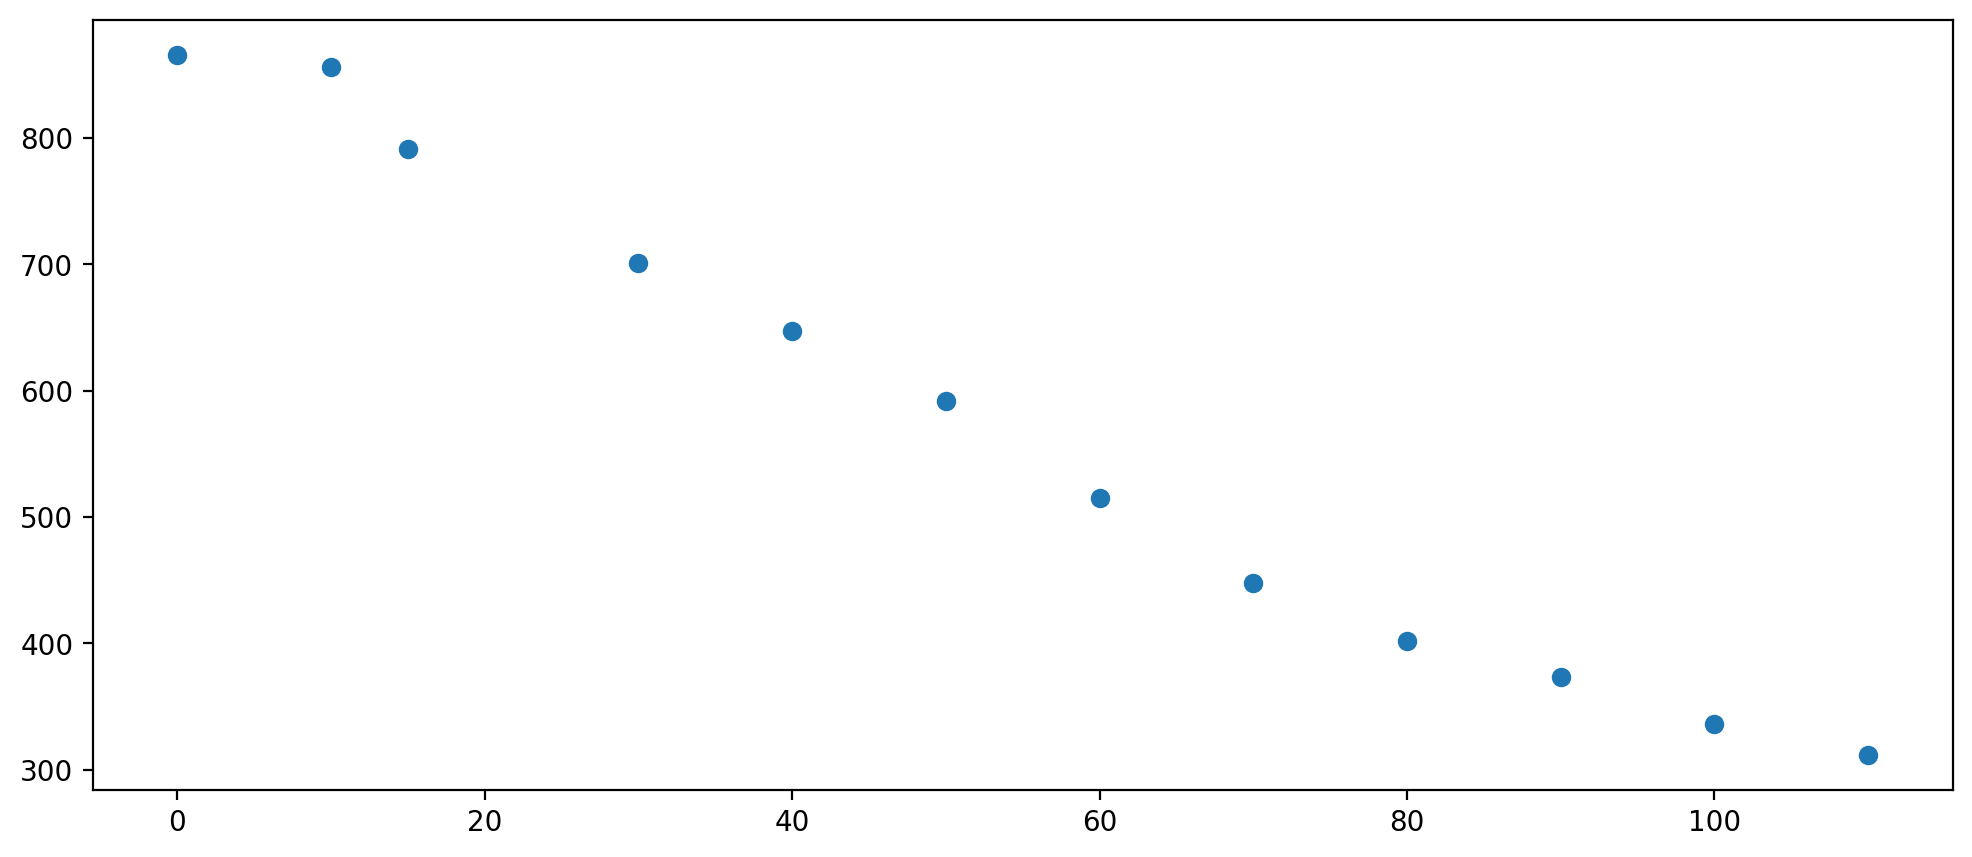

In [5]:
plt.figure(figsize = (12, 5), dpi = 200)

theta_line = np.linspace(0, 90, 1000)
param, _ = curve_fit(interpolation_func, data['theta'], data['N'])
# plt.plot(theta_line, interpolation_func(theta_line, *param))
plt.scatter(data['theta'], data['N'])

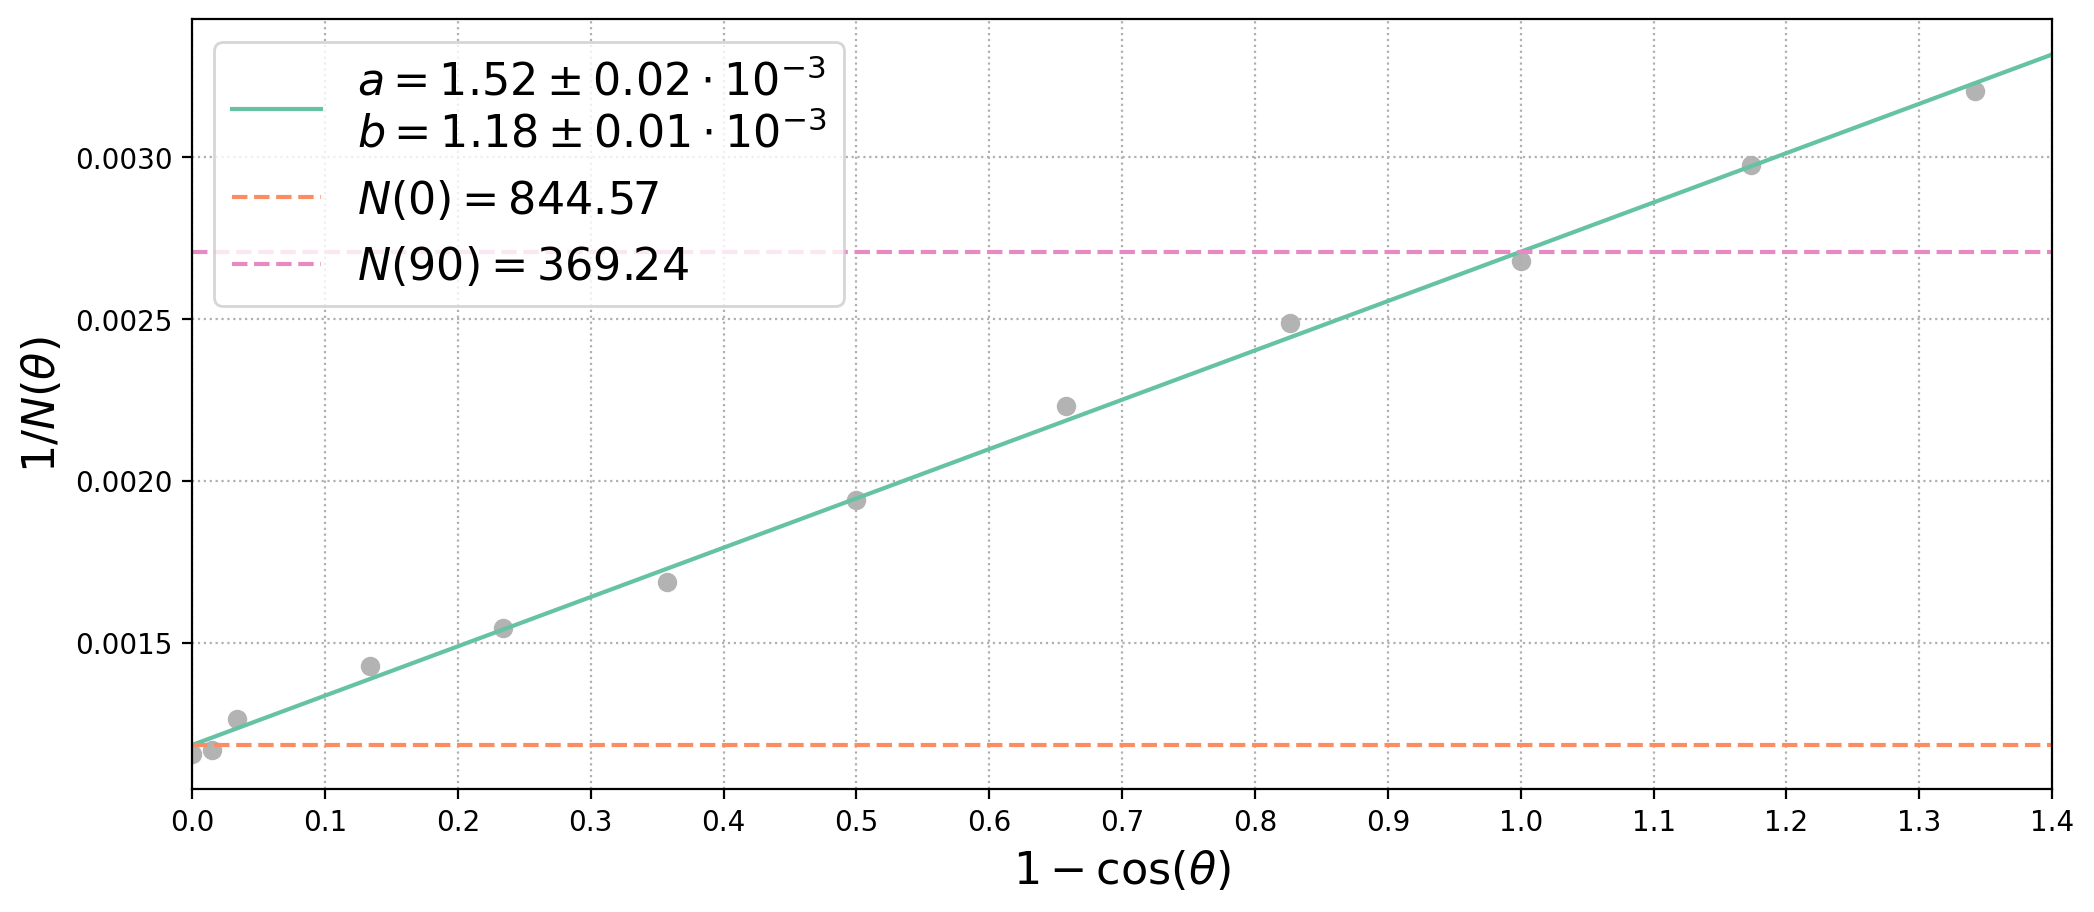

In [34]:
plt.figure(figsize = (12, 5), dpi = 200)


MNK = sts.linregress(1 - np.cos(data['theta'] * np.pi / 180), 1 / data['N'])
x_line = np.linspace(0, 1.4, 1000)
y_line = MNK.slope * x_line + MNK.intercept
N_zero_minus1 = MNK.intercept
N_zero = 1 / N_zero_minus1
N_90_minus1 = MNK.slope + MNK.intercept
N_90 = 1 / N_90_minus1

plt.plot(x_line, 
         y_line, 
         label = f'$a = {MNK.slope * 1e3:.2f} \pm {MNK.stderr * 1e3:.2f}' + '\cdot 10^{-3}$' + f'\n$b = {MNK.intercept * 1e3:.2f} \pm {MNK.intercept_stderr * 1e3:.2f}' + '\cdot 10^{-3}$',
         color = cm.Set2(0))

plt.scatter(1 - np.cos(data['theta'] * np.pi / 180), 1 / data['N'], color = cm.Set2(0.99))
plt.axhline(N_zero_minus1, color = cm.Set2(0.2), linestyle = '--', label = f'$N(0) = {N_zero:.2f}$')
plt.axhline(N_90_minus1, color = cm.Set2(0.4), linestyle = '--', label = f'$N(90) = {N_90:.2f}$')

plt.legend(fontsize = 16)

plt.xlabel(r"$1 - \operatorname{cos}(\theta)$", fontsize = 16)
plt.ylabel(r"$1 / N(\theta)$", fontsize = 16)
plt.xticks(np.arange(0, 1.6, 0.1))
plt.xlim(0, 1.4)
plt.grid(ls = ':')

In [39]:
E_gamma = 662 #кэв
E_e = E_gamma * N_90 / (N_zero - N_90)
print(f"Энергия покоя электрона {E_e / 1e3} МэВ")

Энергия покоя электрона 0.5142323150262788 МэВ
